In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arnabtheaich","key":"e2f0d841618de5627d4de12721fcc4ce"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 89% 291M/329M [00:00<00:00, 606MB/s]
100% 329M/329M [00:00<00:00, 546MB/s]


In [ ]:
!ls


kaggle.json  plant-village.zip	sample_data


In [ ]:
!unzip plant-village.zip -d plant_village

Streaming output truncated to the last 5000 lines.
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-

In [ ]:
!ls plant_village

PlantVillage


In [ ]:
import os

base_path = 'plant_village/PlantVillage'
categories = os.listdir(base_path)
print("Categories:", categories)


Categories: ['Potato___Early_blight', 'Potato___healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Potato___Late_blight', 'Pepper__bell___Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Pepper__bell___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato_Leaf_Mold', 'Tomato__Target_Spot']


In [ ]:
categories = os.listdir(base_path)

# Keep only folders that start with 'Tomato'
tomato_categories = [cat for cat in categories if cat.startswith('Tomato')]

print("Tomato categories:", tomato_categories)


Tomato categories: ['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato_Septoria_leaf_spot', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato_Leaf_Mold', 'Tomato__Target_Spot']


In [ ]:
label_dict = {
    'Tomato_Bacterial_spot': 0,
    'Tomato_Early_blight': 1,
    'Tomato_Late_blight': 2,
    'Tomato_Leaf_Mold': 3,
    'Tomato_Septoria_leaf_spot': 4,
    'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
    'Tomato__Target_Spot': 6,
    'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
    'Tomato__Tomato_mosaic_virus': 8,
    'Tomato_healthy': 9
}


In [ ]:
import glob

image_paths = []
labels = []

extensions = ['*.jpg', '*.JPG', '*.jpeg', '*.png']

for category in label_dict:
    folder_path = os.path.join(base_path, category)
    for ext in extensions:
        for img_file in glob.glob(os.path.join(folder_path, ext)):
            image_paths.append(img_file)
            labels.append(label_dict[category])

print(f"Total images: {len(image_paths)}")

Total images: 16011


In [ ]:
from collections import Counter

label_counts = Counter(labels)
print(label_counts)

Counter({7: 3208, 0: 2127, 2: 1909, 4: 1771, 5: 1676, 9: 1591, 6: 1404, 1: 1000, 3: 952, 8: 373})


In [ ]:
import os

base_path = 'plant_village/PlantVillage'

tomato_categories = [
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_Leaf_Mold',
    'Tomato__Target_Spot',
    'Tomato_healthy',
    'Tomato_Late_blight',
    'Tomato_Early_blight',
    'Tomato_Bacterial_spot'
]

print("Tomato Class folders found:", tomato_categories)

for category in tomato_categories:
    folder_path = os.path.join(base_path, category)
    if os.path.exists(folder_path):
        num_images = len([
            file for file in os.listdir(folder_path)
            if file.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        print(f"{category}: {num_images} images")
    else:
        print(f"Warning: Folder not found - {category}")


Tomato Class folders found: ['Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_Leaf_Mold', 'Tomato__Target_Spot', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Tomato_Bacterial_spot']
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 images
Tomato__Tomato_mosaic_virus: 373 images
Tomato_Leaf_Mold: 952 images
Tomato__Target_Spot: 1404 images
Tomato_healthy: 1591 images
Tomato_Late_blight: 1909 images
Tomato_Early_blight: 1000 images
Tomato_Bacterial_spot: 2127 images


In [ ]:
from PIL import Image
import numpy as np
import os

images = []
labels = []

data_dir = "plant_village/PlantVillage"  # Adjust if needed

for label_name in label_dict.keys():
    folder_path = os.path.join(data_dir, label_name)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path).convert("RGB").resize((128, 128))
                img_np = np.array(img)
                images.append(img_np)
                labels.append(label_dict[label_name])  # Use numeric label from label_dict
            except Exception as e:
                print(f"Skipped file {file_path}: {e}")
                continue

print(f"Loaded {len(images)} images with labels.")


Skipped file plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c: cannot identify image file 'plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c'
Loaded 16011 images with labels.


In [ ]:
!pip install PyWavelets

In [ ]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from skimage.measure import shannon_entropy
from sklearn.preprocessing import StandardScaler
import pywt
from scipy.fft import fft2

features_list = []

# Parameters for LBP and GLCM
LBP_P = 8
LBP_R = 1
LBP_METHOD = 'uniform'
GLCM_DISTANCES = [1]
GLCM_ANGLES = [0]
GLCM_LEVELS = 256

valid_image_size = (128, 128)  # Assuming images are resized beforehand

for img in images:
    # --- Color Features (HSV mean & std) ---
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_mean, s_mean, v_mean = hsv[:, :, 0].mean(), hsv[:, :, 1].mean(), hsv[:, :, 2].mean()
    h_std, s_std, v_std = hsv[:, :, 0].std(), hsv[:, :, 1].std(), hsv[:, :, 2].std()

    # --- Color Histogram Features (RGB) ---
    hist_features = []
    for channel in range(3):
        hist = cv2.calcHist([img], [channel], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        hist_features.extend(hist)

    # --- Texture Features (GLCM + Entropy) ---
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(gray, distances=GLCM_DISTANCES, angles=GLCM_ANGLES,
                        levels=GLCM_LEVELS, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    entropy = shannon_entropy(gray)

    # --- LBP Features ---
    lbp = local_binary_pattern(gray, P=LBP_P, R=LBP_R, method=LBP_METHOD)
    n_bins = LBP_P + 2  # uniform patterns histogram bins
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins - 1))
    lbp_hist = lbp_hist.astype('float') / (lbp_hist.sum() + 1e-6)

    # --- Edge Features (Canny) ---
    edges = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges > 0) / edges.size

    # --- Frequency Domain Features (DFT and DWT) ---
    dft = np.abs(fft2(gray))[:10, :10].flatten()

    coeffs = pywt.wavedec2(gray, 'haar', level=2)
    dwt_features = []
    for detail_level in coeffs[1:]:
        for arr in detail_level:  # H, V, D
            dwt_features.extend(arr.flatten()[:10])
    dwt_features = np.array(dwt_features)

    # --- Shape Features ---
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        cnt = max(contours, key=cv2.contourArea)
        M = cv2.moments(cnt)
        hu = cv2.HuMoments(M).flatten()
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / h if h > 0 else 0
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        solidity = area / hull_area if hull_area > 0 else 0
        extent = area / (w * h) if w * h > 0 else 0
        # Eccentricity calculation adjusted to avoid division by zero
        denom = M["mu20"] + M["mu02"] + 1e-5
        eccentricity = np.sqrt((M["mu20"] - M["mu02"])**2 + 4*M["mu11"]**2) / denom
    else:
        hu = np.zeros(7)
        area = perimeter = aspect_ratio = solidity = extent = eccentricity = 0

    # Combine all features into one vector
    feature_vector = [
        h_mean, s_mean, v_mean, h_std, s_std, v_std,
        contrast, homogeneity, energy, correlation, entropy,
        area, perimeter, aspect_ratio, solidity, extent, eccentricity,
        edge_density
    ] + hu.tolist() + lbp_hist.tolist() + hist_features + dft.tolist() + dwt_features.tolist()

    features_list.append(feature_vector)

# --- Normalize Features ---
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_list)


In [ ]:
# Convert features and labels to numpy arrays
X = np.array(features_list)
y = np.array(labels)

# Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Classes found:", le.classes_)

# Split dataset into training and testing sets (80% train, 20% test)
# Stratify ensures class distribution is maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Normalize features using StandardScaler (fit on train, transform both)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now X_train, X_test, y_train, y_test are ready for model training and evaluation


Classes found: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# --- SVM Model Training with GridSearchCV ---
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, refit=True)
grid.fit(X_train, y_train)

model = grid.best_estimator_
print("Best SVM Parameters:", grid.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



=== SVM ===
 Test Accuracy: 90.42%

 Classification Report:
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.94      0.96      0.95       426
                        Tomato_Early_blight       0.82      0.69      0.74       200
                         Tomato_Late_blight       0.79      0.89      0.84       382
                           Tomato_Leaf_Mold       0.93      0.86      0.90       190
                  Tomato_Septoria_leaf_spot       0.93      0.91      0.92       354
Tomato_Spider_mites_Two_spotted_spider_mite       0.88      0.91      0.89       335
                        Tomato__Target_Spot       0.88      0.85      0.86       281
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.95      0.94      0.94       642
                Tomato__Tomato_mosaic_virus       0.94      0.85      0.90        75
                             Tomato_healthy       0.96      0.99      0.98       318

  

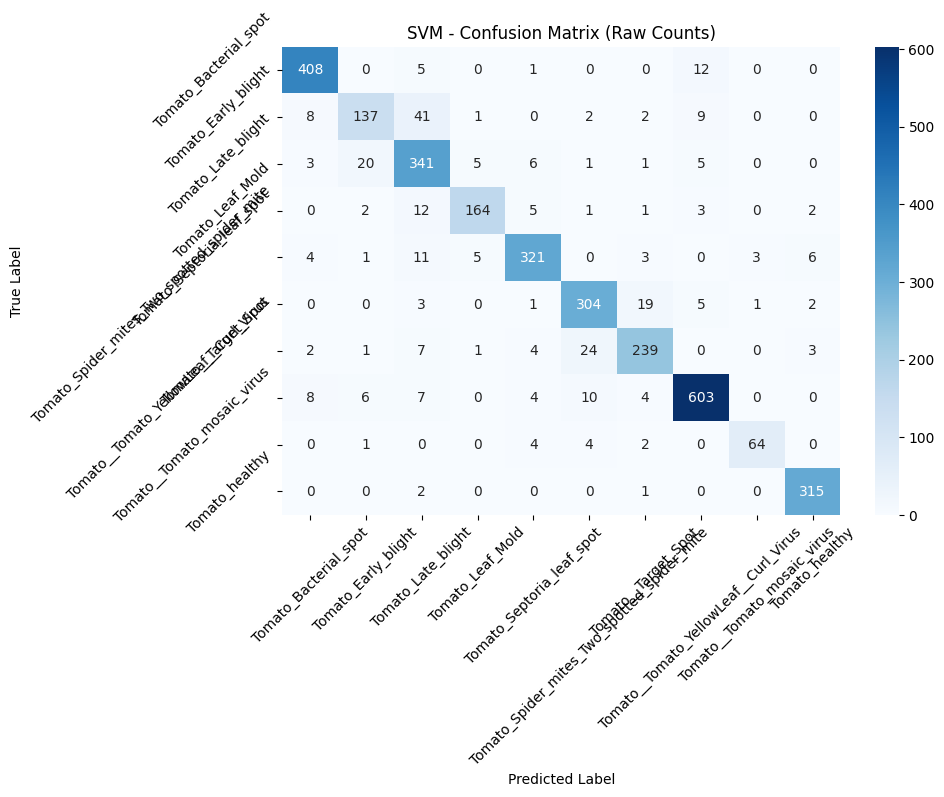

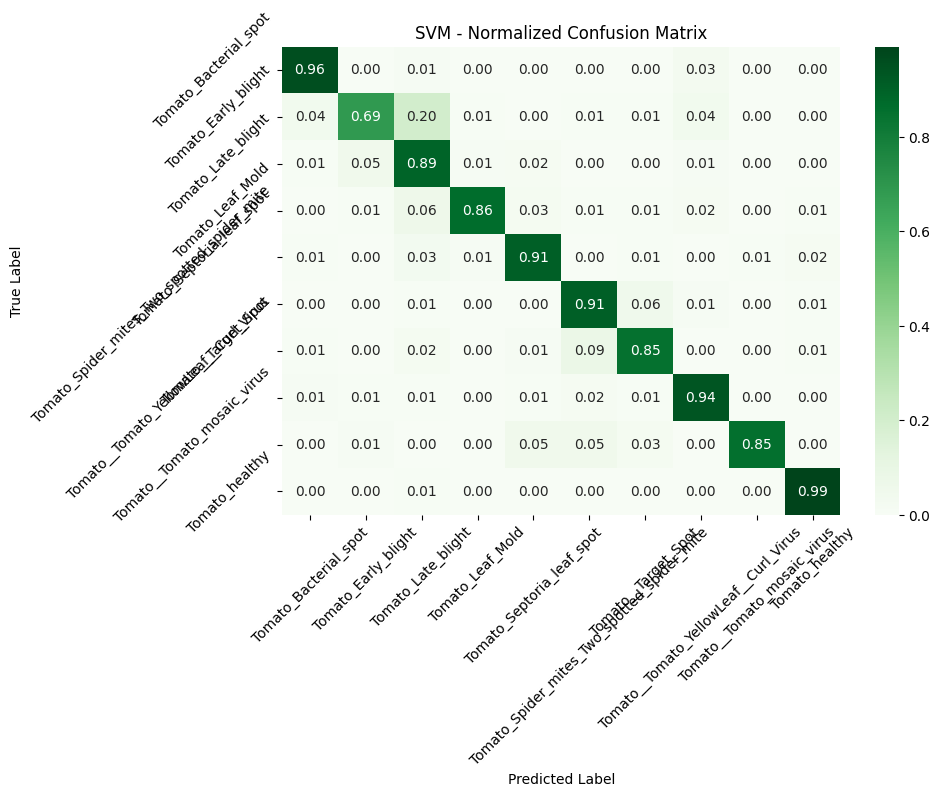

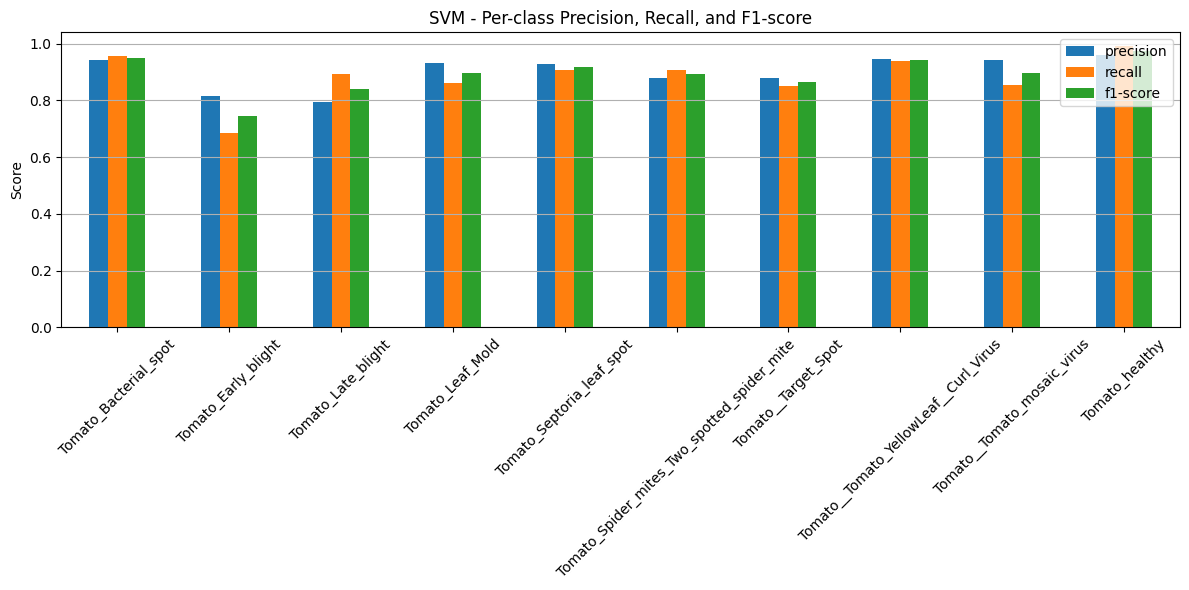


=== Random Forest ===
 Test Accuracy: 90.20%

 Classification Report:
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.87      0.94      0.91       426
                        Tomato_Early_blight       0.82      0.67      0.73       200
                         Tomato_Late_blight       0.87      0.83      0.85       382
                           Tomato_Leaf_Mold       0.93      0.87      0.90       190
                  Tomato_Septoria_leaf_spot       0.91      0.93      0.92       354
Tomato_Spider_mites_Two_spotted_spider_mite       0.91      0.90      0.91       335
                        Tomato__Target_Spot       0.87      0.88      0.88       281
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.92      0.96      0.94       642
                Tomato__Tomato_mosaic_virus       1.00      0.85      0.92        75
                             Tomato_healthy       0.96      0.98      0.97    

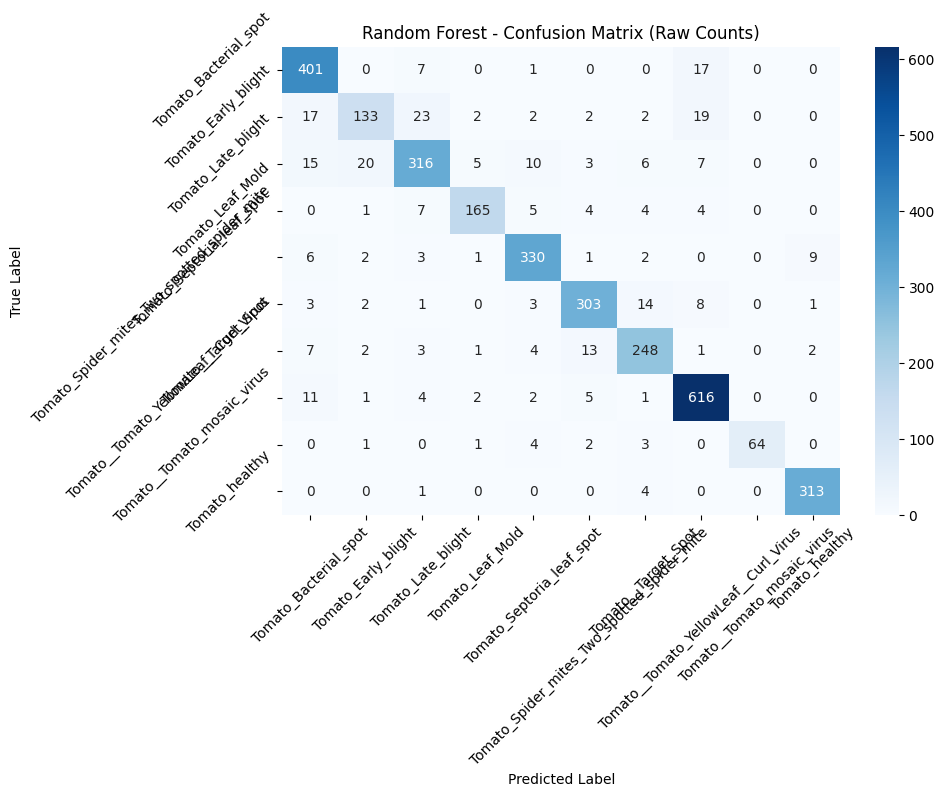

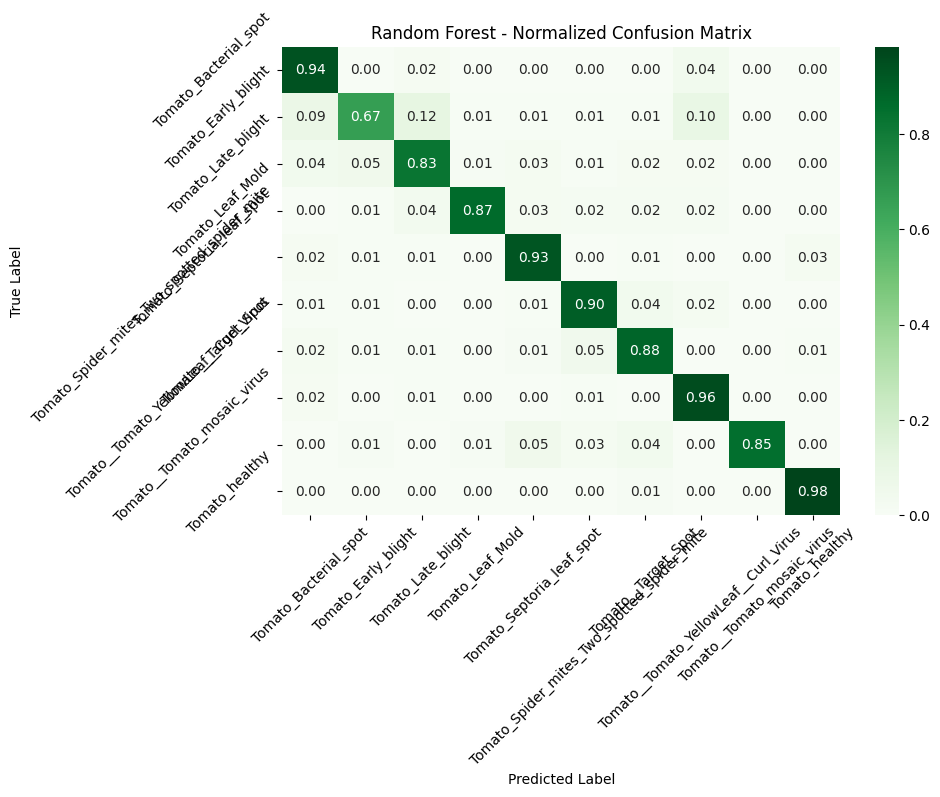

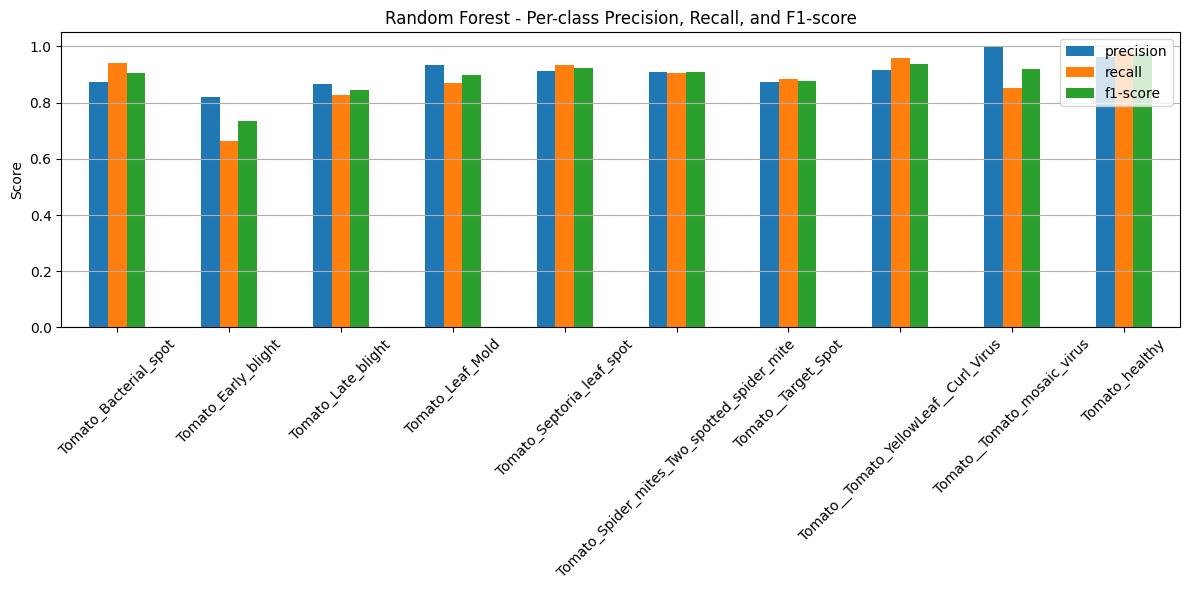


=== Naive Bayes ===
 Test Accuracy: 49.08%

 Classification Report:
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.52      0.90      0.66       426
                        Tomato_Early_blight       0.39      0.33      0.35       200
                         Tomato_Late_blight       0.78      0.13      0.23       382
                           Tomato_Leaf_Mold       0.38      0.23      0.29       190
                  Tomato_Septoria_leaf_spot       0.68      0.28      0.40       354
Tomato_Spider_mites_Two_spotted_spider_mite       0.35      0.76      0.48       335
                        Tomato__Target_Spot       0.58      0.06      0.12       281
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.73      0.61      0.66       642
                Tomato__Tomato_mosaic_virus       0.15      0.97      0.26        75
                             Tomato_healthy       0.95      0.60      0.73      

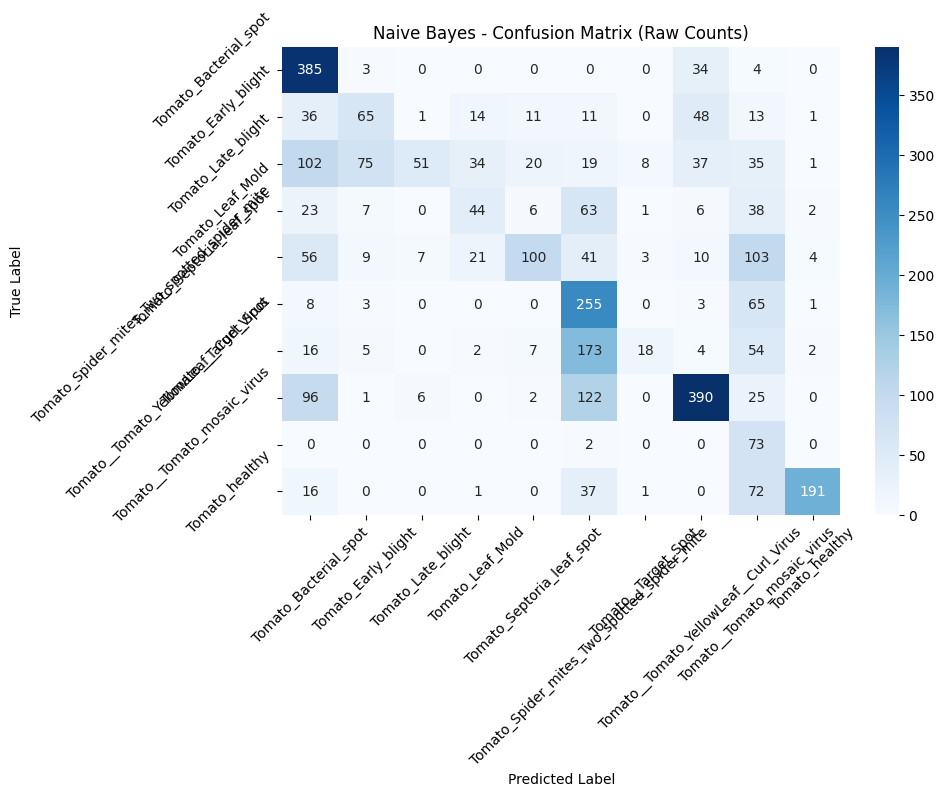

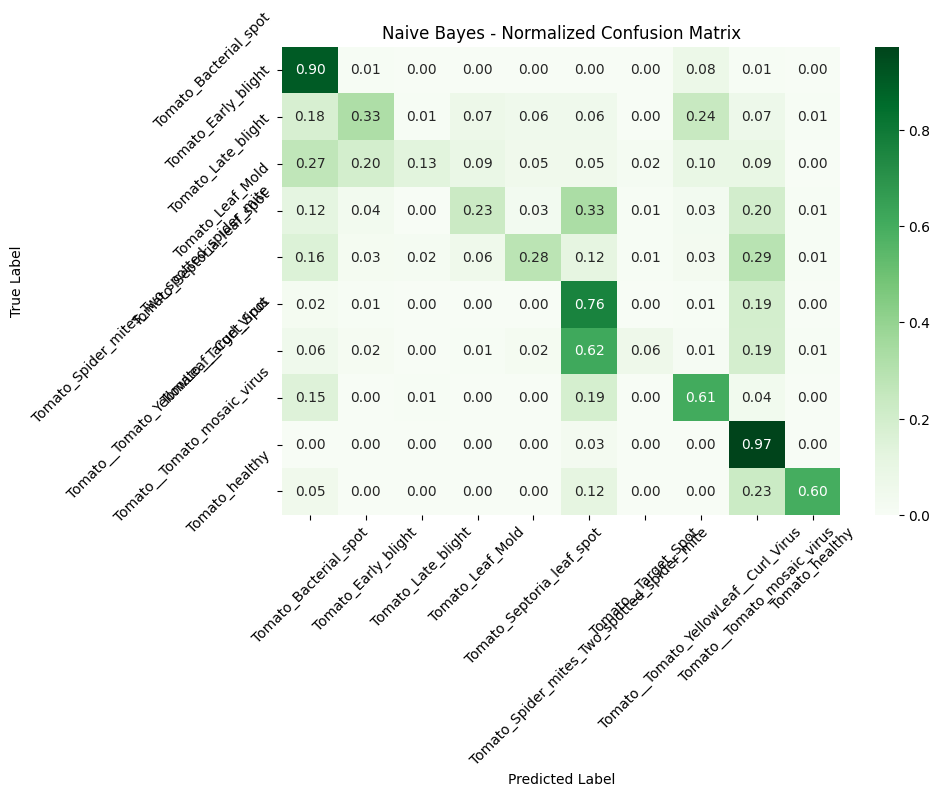

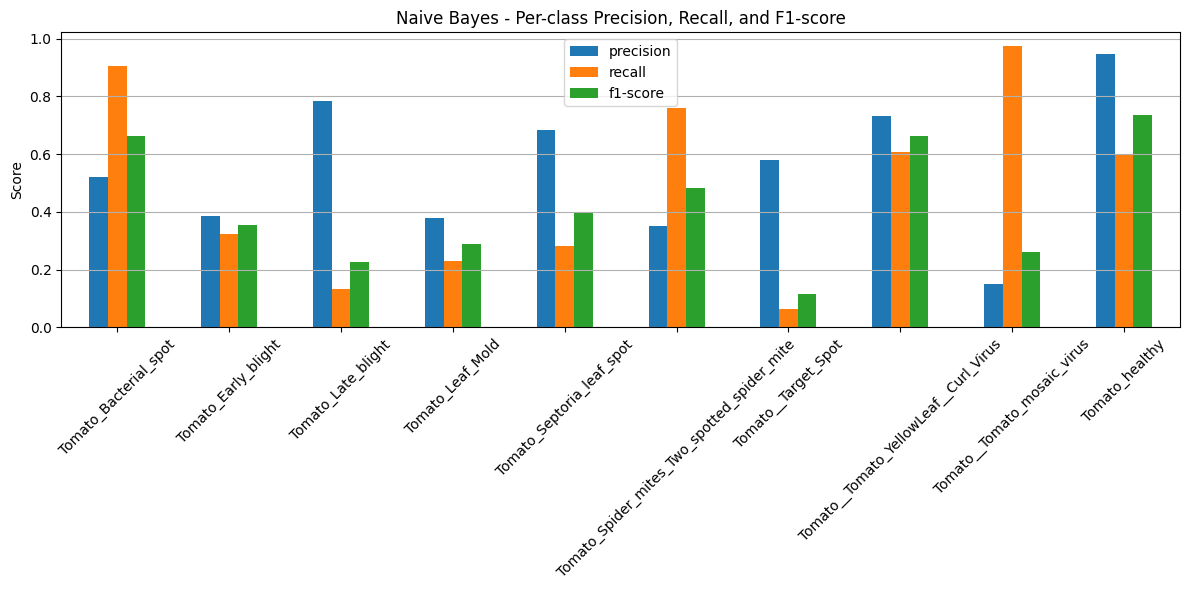


=== XGBoost ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:13:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Test Accuracy: 93.69%

 Classification Report:
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.94      0.97      0.96       426
                        Tomato_Early_blight       0.84      0.74      0.79       200
                         Tomato_Late_blight       0.89      0.88      0.88       382
                           Tomato_Leaf_Mold       0.94      0.93      0.93       190
                  Tomato_Septoria_leaf_spot       0.95      0.97      0.96       354
Tomato_Spider_mites_Two_spotted_spider_mite       0.92      0.96      0.94       335
                        Tomato__Target_Spot       0.90      0.91      0.91       281
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.97      0.98      0.97       642
                Tomato__Tomato_mosaic_virus       1.00      0.88      0.94        75
                             Tomato_healthy       0.99      0.99      0.99       318

               

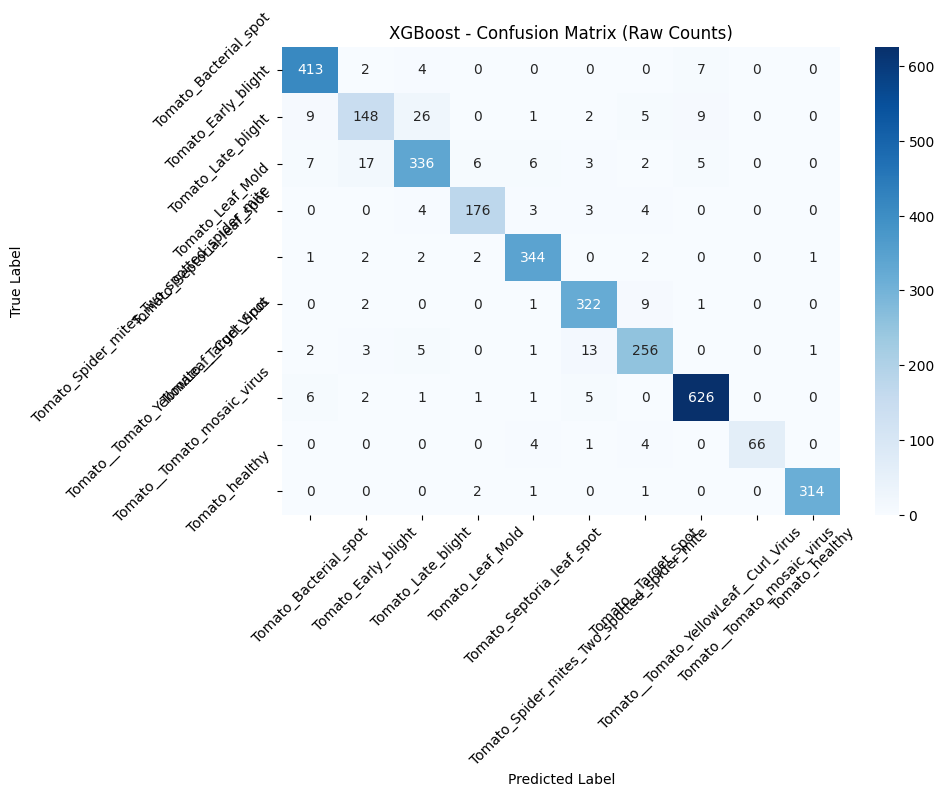

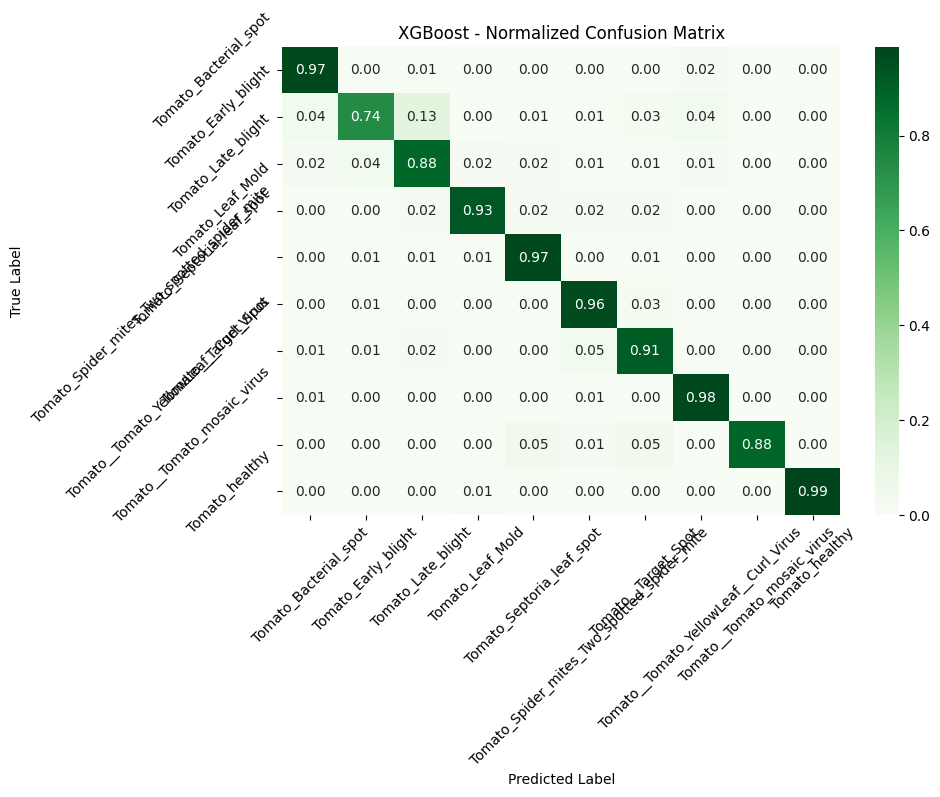

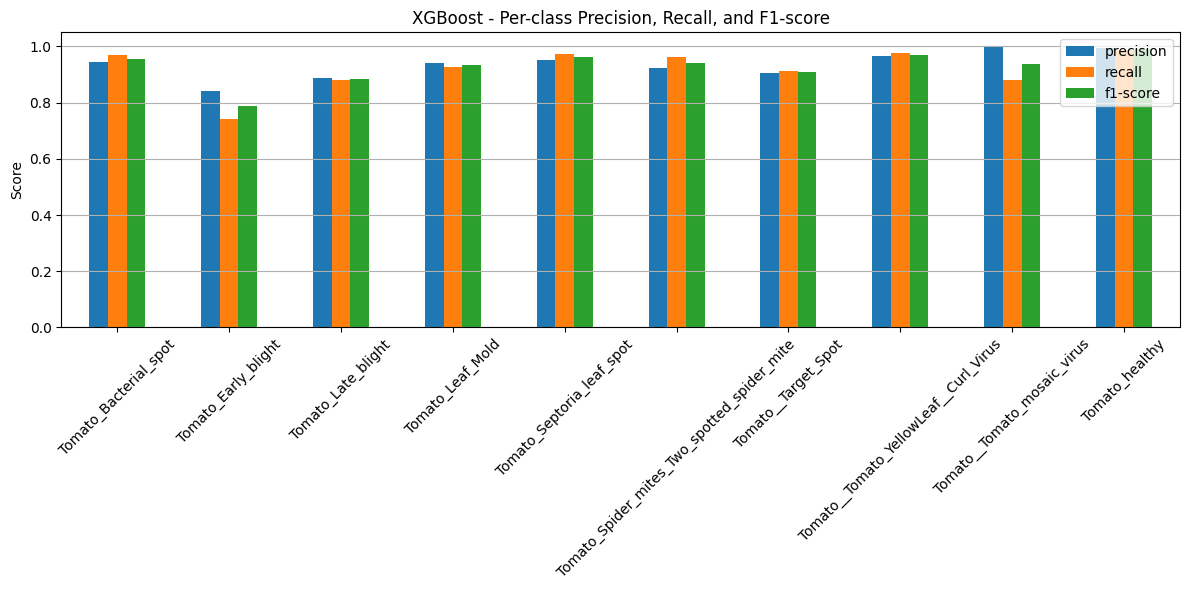


=== KNN ===
 Test Accuracy: 73.77%

 Classification Report:
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.72      0.93      0.81       426
                        Tomato_Early_blight       0.65      0.52      0.58       200
                         Tomato_Late_blight       0.72      0.67      0.70       382
                           Tomato_Leaf_Mold       0.70      0.75      0.72       190
                  Tomato_Septoria_leaf_spot       0.85      0.76      0.80       354
Tomato_Spider_mites_Two_spotted_spider_mite       0.57      0.82      0.67       335
                        Tomato__Target_Spot       0.57      0.62      0.59       281
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.89      0.81      0.85       642
                Tomato__Tomato_mosaic_virus       0.78      0.63      0.70        75
                             Tomato_healthy       0.99      0.55      0.71       318

  

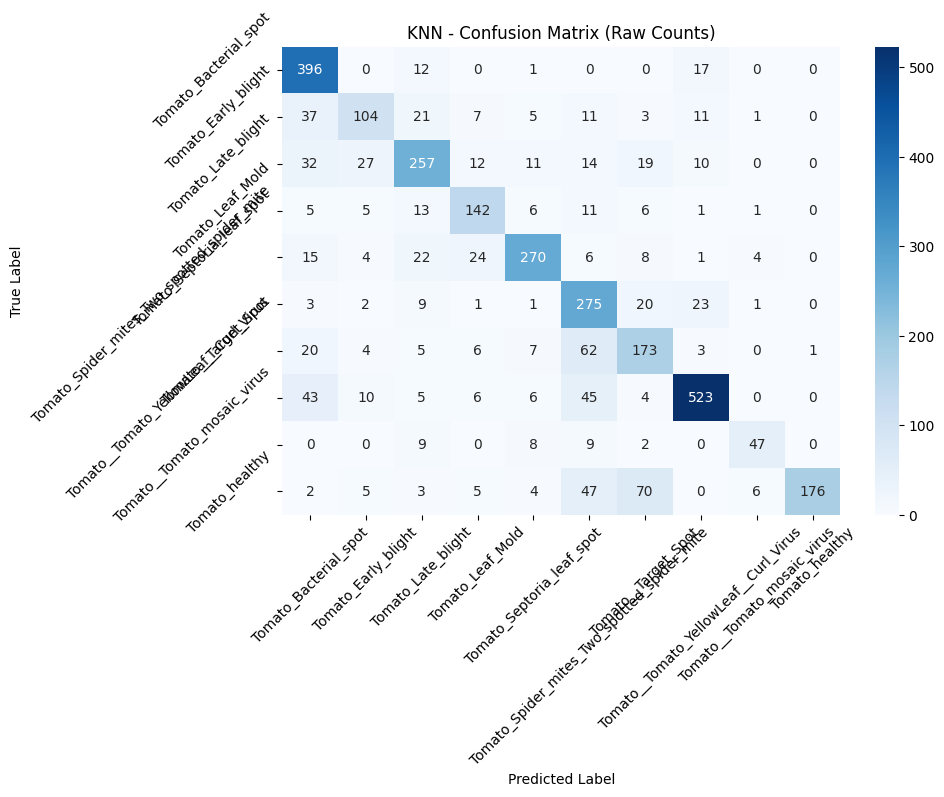

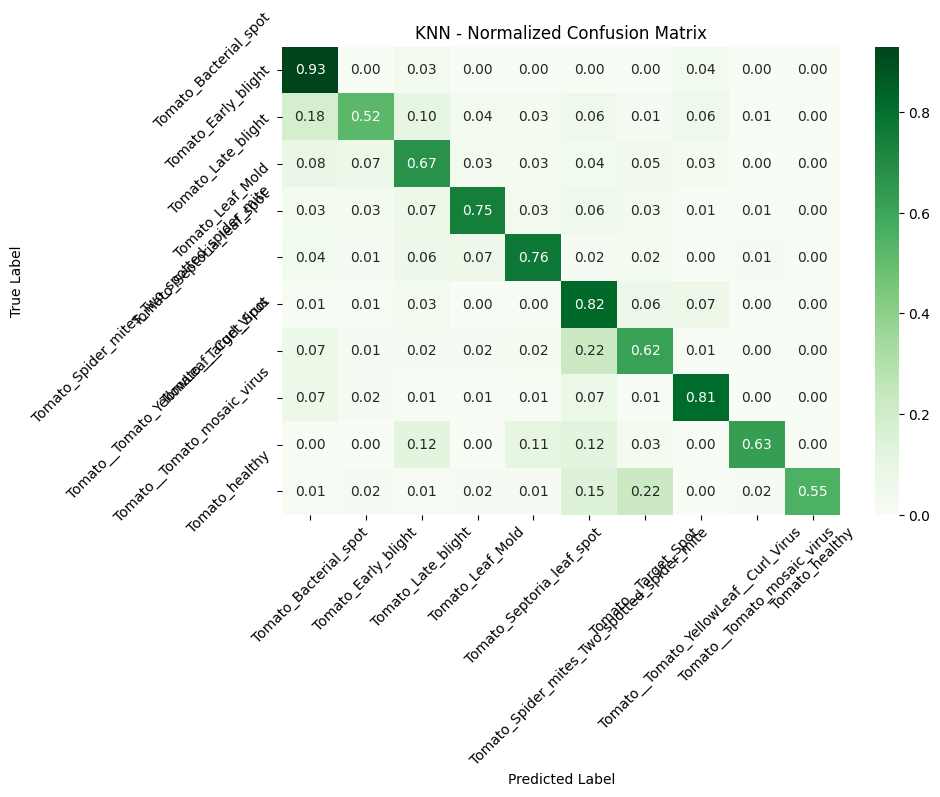

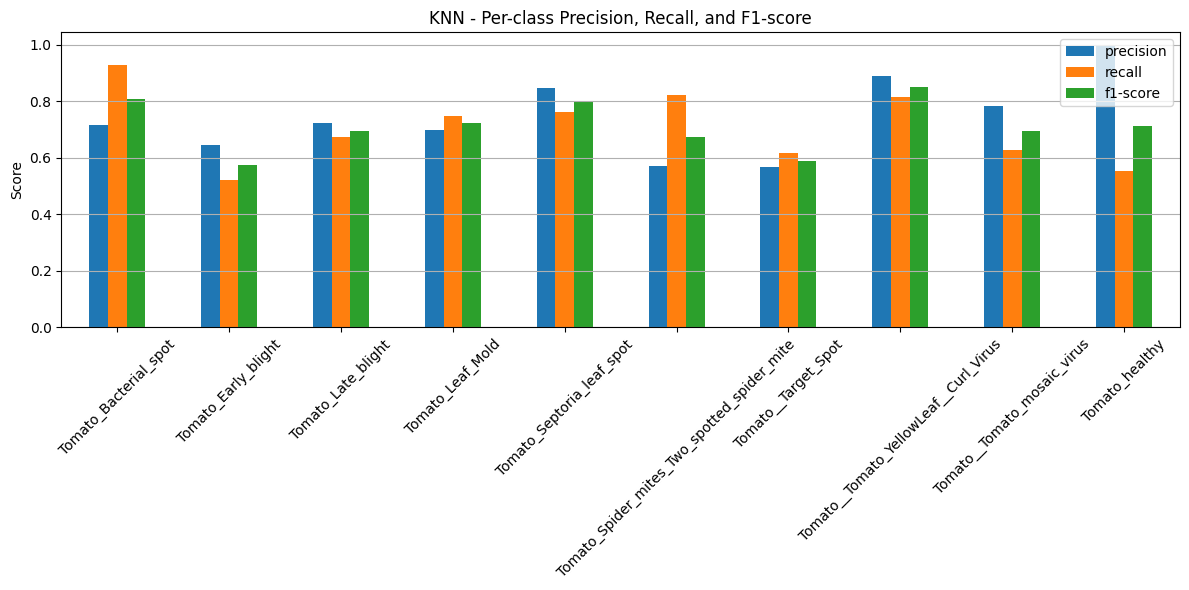

In [ ]:
models = {
    'SVM': model,  # assuming 'model' is your trained SVM
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier()
}

class_names = list(label_dict.keys())

for model_name, clf in models.items():
    print(f"\n=== {model_name} ===")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f" Test Accuracy: {acc:.2%}")

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\n Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix (Raw)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix (Raw Counts)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Confusion Matrix (Normalized)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names, cmap='Greens')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Normalized Confusion Matrix")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Precision/Recall/F1
    metrics_df = pd.DataFrame(report).transpose().iloc[:-3, :]
    metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
    plt.title(f"{model_name} - Per-class Precision, Recall, and F1-score")
    plt.ylabel("Score")
    plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

In [ ]:
results = []

for model_name, clf in models.items():
    print(f"\n=== {model_name} ===")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results.append((model_name, acc))

print("\n=== Model Comparison Summary ===")
for name, score in results:
    print(f"{name}: {score:.2%}")


=== SVM ===

=== Random Forest ===

=== Naive Bayes ===

=== XGBoost ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:16:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== KNN ===

=== Model Comparison Summary ===
SVM: 90.42%
Random Forest: 90.20%
Naive Bayes: 49.08%
XGBoost: 93.69%
KNN: 73.77%


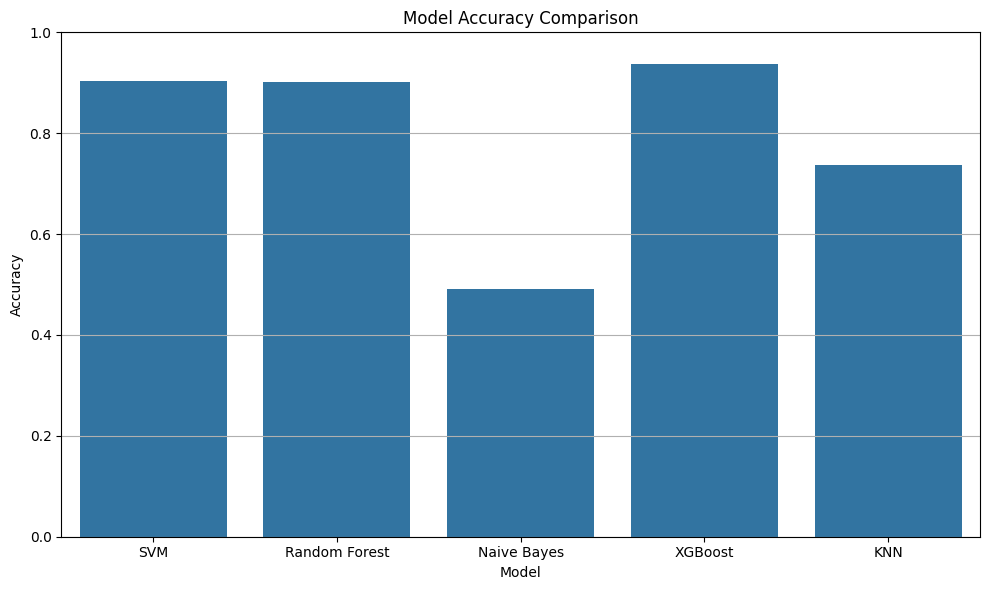

In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()